In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Polynomialdata_train.csv')
df.head()

target  feature 1  feature 2  feature 3
0  4.131528e+06   5.221849   7.295111  95.716846
1  3.172975e-01  -5.106284   4.220085  -6.172360
2  4.676422e+04  -4.218053  -7.573823 -39.493884
3  1.404175e+05 -18.439122  -2.275148 -40.885857
4  4.788988e+03  13.353046   3.103837  18.622367

In [4]:
X_train=np.array(df.loc[0:39999,'feature 1':'feature 3'])


In [5]:
y_train=np.array(df.loc[0:39999,'target'])

In [6]:
X_cv=np.array(df.loc[40000:,'feature 1':'feature 3'])
y_cv=np.array(df.loc[40000:,'target'])

In [7]:
y_cv.shape

(10000,)

In [8]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(X_train[:,0],y_train)
ax[0].set_xlabel('feature 1')
ax[0].set_ylabel('Label')
ax[1].scatter(X_train[:,1],y_train)
ax[1].set_xlabel('feature 2')
ax[1].set_ylabel('Label')
ax[2].scatter(X_train[:,2],y_train)
ax[2].set_xlabel('feature 3')
ax[2].set_ylabel('Label')
plt.tight_layout()
plt.show()

In [9]:
def normalize(X):
    mean=np.mean(X,axis=0)
    dev=np.std(X,axis=0)
    return (X-mean)/dev,mean,dev

In [10]:
def polynomial_features(X,deg):
    X_poly=[]
    for i in range(deg+1):
        for j in range(deg+1-i):
            for k in range(deg+1-i-j):
                X_poly.append([X[:,0]**i*X[:,1]**j*X[:,2]**k])
    X_poly=np.squeeze(np.array(X_poly),axis=1).T
    return X_poly[:,1:]

In [11]:
def total_cost(X,y,W,b):
  cost=(np.sum((np.dot(X,W)+b-y)**2))/(2*X.shape[0])
  return cost
def gradient(X,y,W,b):
    m,n=X.shape
    f_wb=np.dot(X,W)+b
    dj_dw=np.zeros(n,)
    dj_db=0.0
    dj_dw=np.dot(X.T,f_wb-y)/m
    dj_db=np.sum(f_wb-y)/m
    return dj_dw,dj_db

In [12]:
def fit(X_t,y_t,lr,iters): 
    J_hist=[]
    Weights=np.zeros(X_t.shape[1],)
    bias=0.0
    for i in range(iters):
        dj_dw,dj_db=gradient(X_t,y_t,Weights,bias)
        Weights=Weights-lr*dj_dw
        bias=bias-lr*dj_db
        c=total_cost(X_t,y_t,Weights,bias)
        J_hist.append(c)
    J_hist=np.array(J_hist)
    return Weights,bias,J_hist

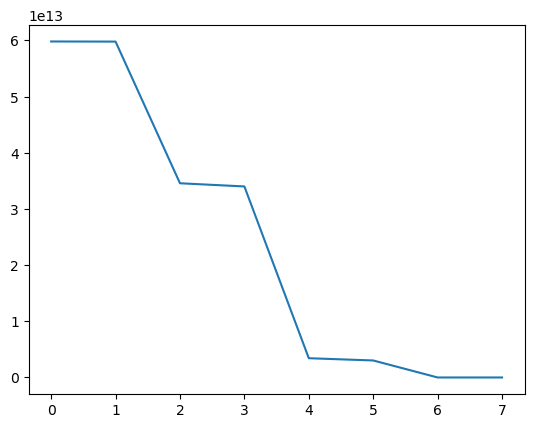

In [13]:
c=[]
lr=0.1
iters=10000
for i in range (8):
    X_t,mean,dev=normalize(polynomial_features(X_train,i))
    Weights,bias,J_hist=fit(X_t,y_train,lr,iters)
    
    c.append(J_hist[-1])
plt.plot(c)

In [14]:
X_t_f,mean_f,div_f=normalize(polynomial_features(X_train,6))
iters=40000
lr=0.2
Weights,bias,J_hist=fit(X_t_f,y_train,lr,iters)
for i in range(iters):
  if (i%1000==0):
    print(" cost at ", i, " = ", J_hist[i])

 cost at  0  =  17766530084410.605
 cost at  1000  =  2906295970.345674
 cost at  2000  =  73455499.20466657
 cost at  3000  =  1997579.105805176
 cost at  4000  =  57701.6012812711
 cost at  5000  =  1749.1675602105024
 cost at  6000  =  54.94353949432317
 cost at  7000  =  1.7687082539329957
 cost at  8000  =  0.0578649270502411
 cost at  9000  =  0.0019127591073319263
 cost at  10000  =  6.363796804049848e-05
 cost at  11000  =  2.1257549952951647e-06
 cost at  12000  =  7.118352203593534e-08
 cost at  13000  =  2.3873146093616186e-09
 cost at  14000  =  8.014264537514829e-11
 cost at  15000  =  2.6942682390603597e-12
 cost at  16000  =  9.137296416028986e-14
 cost at  17000  =  3.3868510279386185e-15
 cost at  18000  =  4.885831680743547e-16
 cost at  19000  =  3.269688665827245e-16
 cost at  20000  =  3.1069544349390117e-16
 cost at  21000  =  3.0980259090790194e-16
 cost at  22000  =  3.132968532935361e-16
 cost at  23000  =  3.095368317629786e-16
 cost at  24000  =  3.0597417355

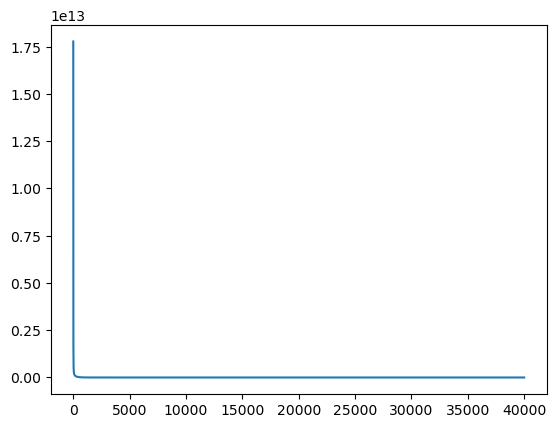

In [15]:
plt.plot(J_hist)
plt.show()

In [16]:
X_cvt=(polynomial_features(X_cv,6)-mean_f)/div_f
y_pred=np.dot(X_cvt,Weights)+bias

In [17]:
def predict(x,Weights,bias):
  return np.dot(x,Weights)+bias


In [18]:
y_pred=predict(X_cvt,Weights,bias)
y_pred.shape

(10000,)

In [19]:
y_pred_train=predict(X_t_f,Weights,bias)

In [20]:
def r2_score(y,y_pred):
    return 1-np.sum(((y_pred-y)**2))/np.sum((y-np.mean(y))**2)

In [21]:
print(r2_score(y_cv,y_pred))

1.0


In [22]:
print(r2_score(y_train,y_pred_train))

1.0


In [23]:
df2=pd.read_csv('Polynomialdata_test (1).csv')

In [24]:
df2.head()

ID  feature 1  feature 2  feature 3
0  16588  36.247643  -2.372704  43.835947
1  17513   5.903779   5.460086 -96.149414
2  14448 -37.298157   6.869786 -14.084487
3  13972 -40.080077   2.395066 -43.432941
4  18321 -20.417799  -2.194459   5.737226

In [25]:
X_test=np.array(df2.loc[:,'feature 1':'feature 3'])

In [28]:
X_test_n=(polynomial_features(X_test,6)-mean_f)/div_f

In [29]:
y_test=np.dot(X_test_n,Weights)+bias